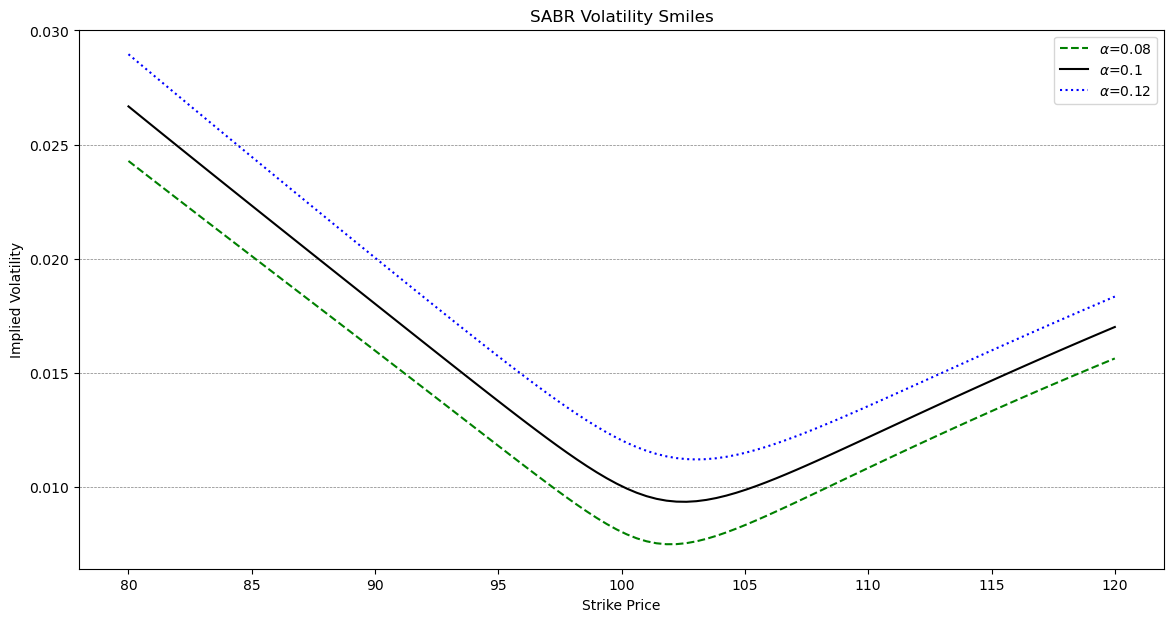

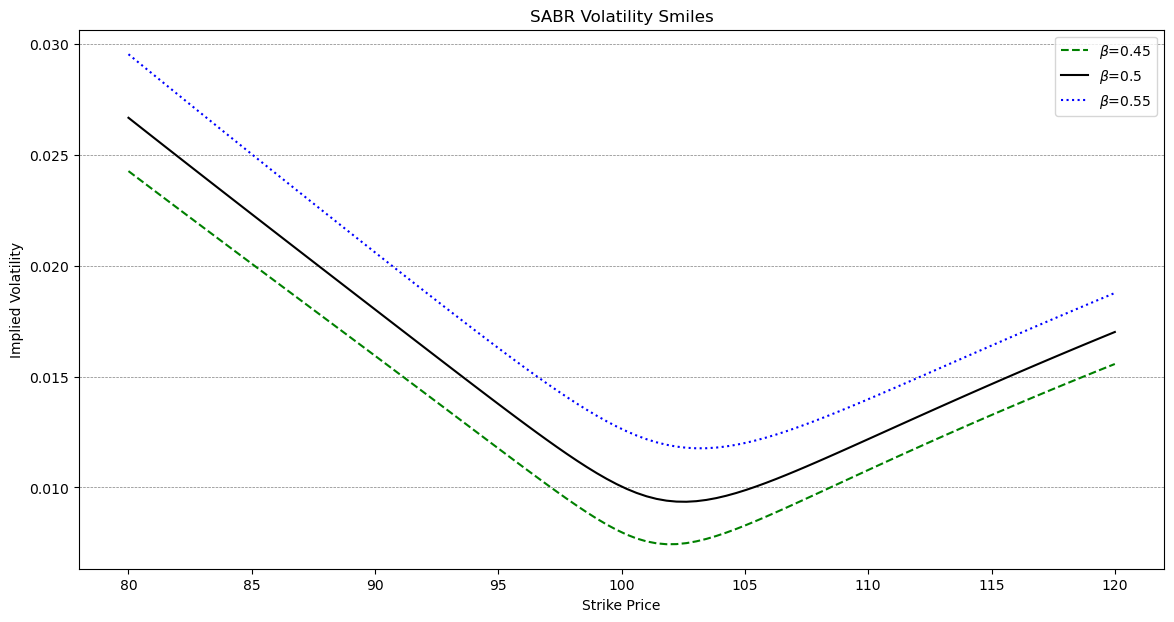

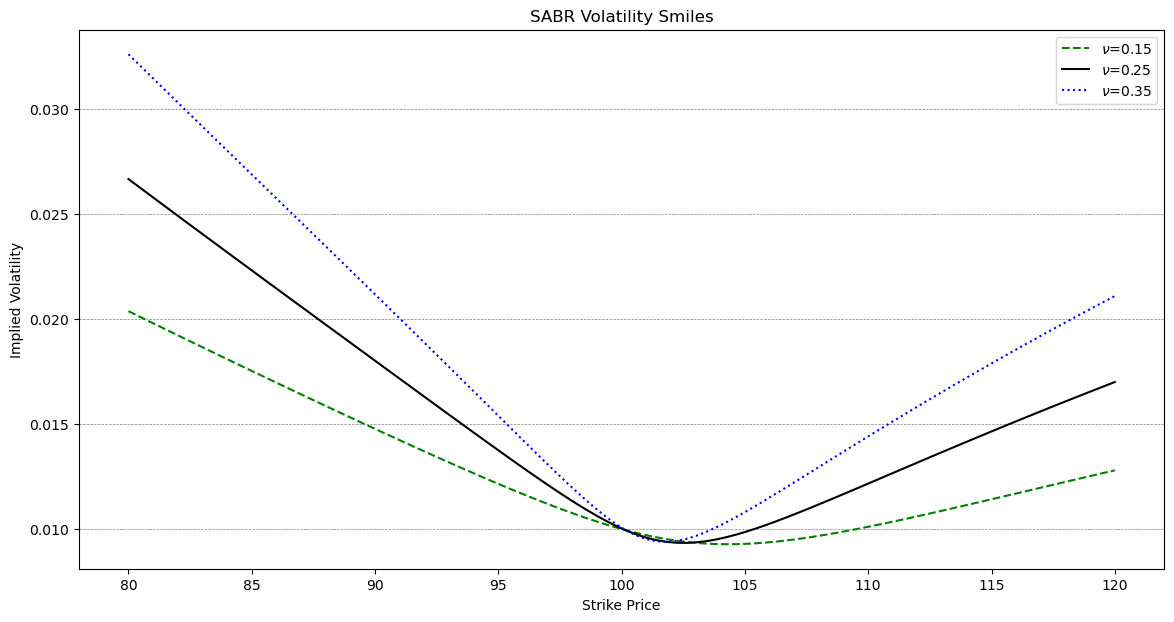

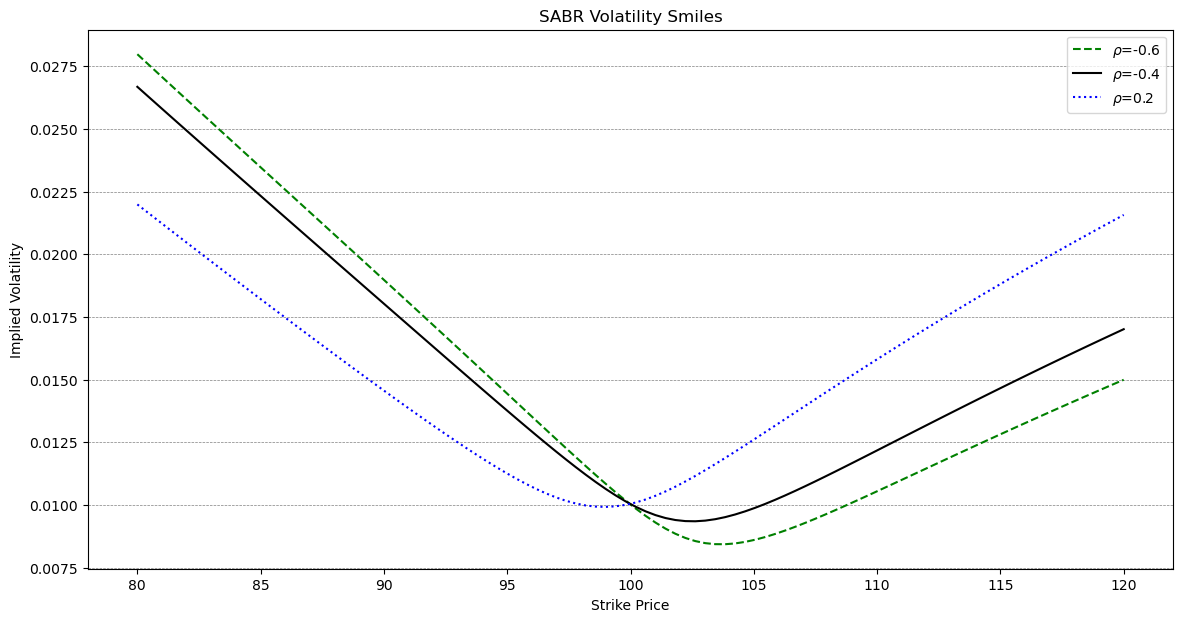

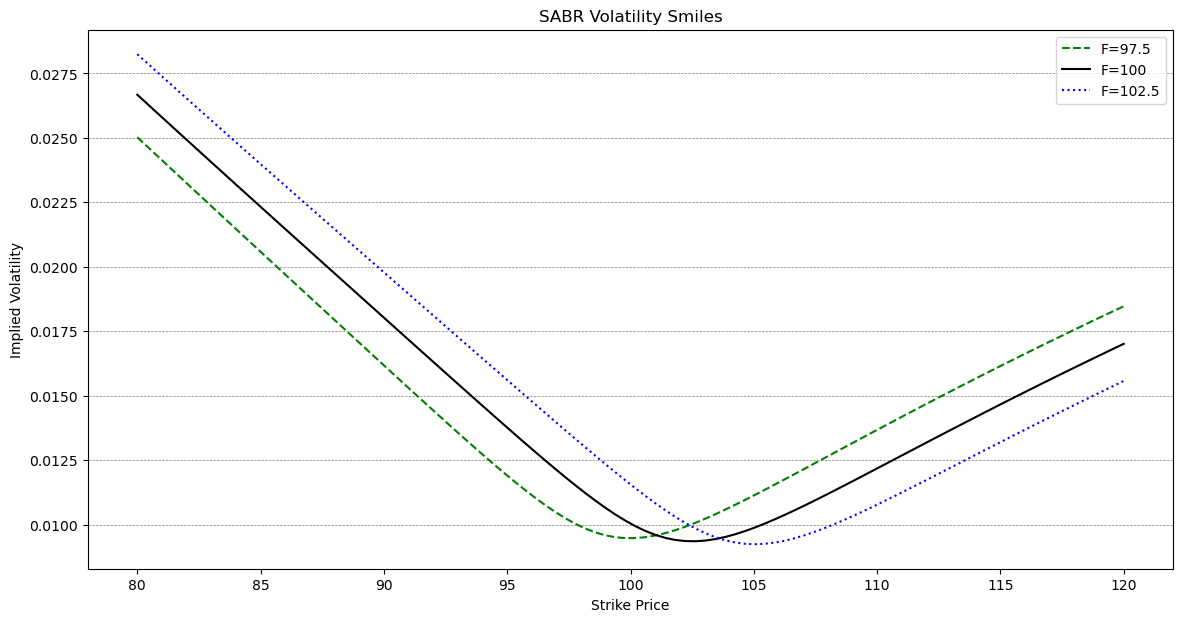

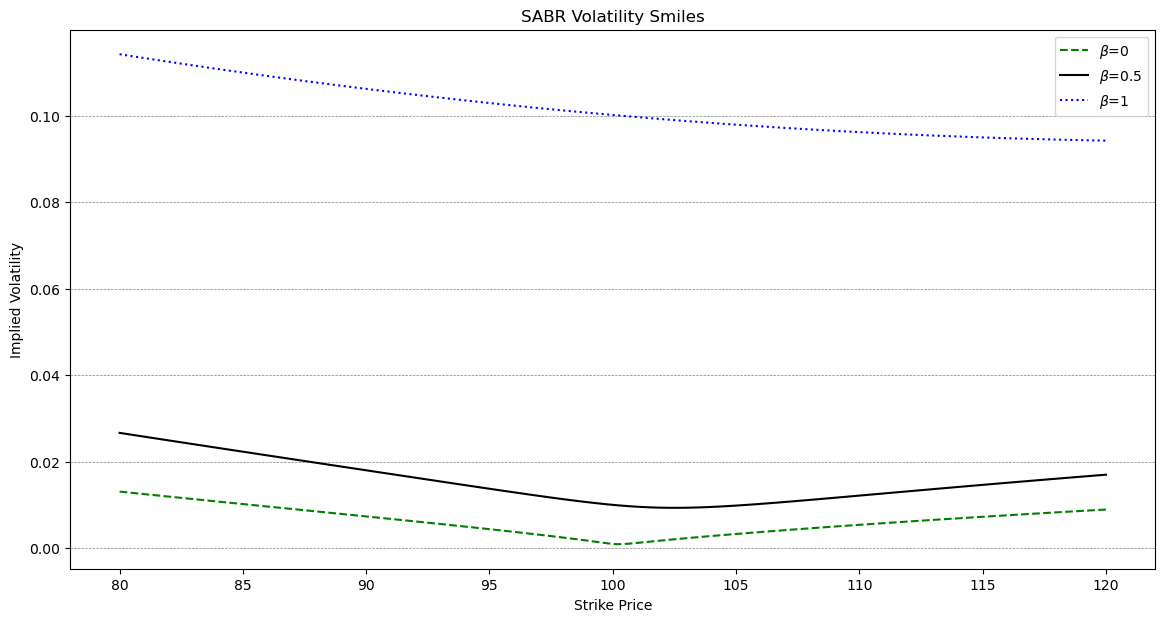

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sabr_volatility(F, K, T, alpha, beta, rho, nu):

    if F == K:
        fk_beta = F**(1 - beta)
        vol = (alpha / fk_beta) * (1 + ((1 - beta)**2 * alpha**2 / (24 * fk_beta**2) +
              rho * beta * nu * alpha / (4 * fk_beta) + (2 - 3 * rho**2) * nu**2 / 24) * T)
    else:
        fk_beta = F**(1 - beta) * K**(1 - beta)
        z = nu / alpha * fk_beta**0.5 * np.log(F / K)
        x_z = np.log((np.sqrt(1 - 2 * rho * z + z**2) + z - rho) / (1 - rho))
        vol = (alpha / fk_beta**0.5 * z / x_z) * (1 + ((1 - beta)**2 * alpha**2 / (24 * fk_beta) +
              rho * beta * nu * alpha / (4 * fk_beta**0.5) + (2 - 3 * rho**2) * nu**2 / 24) * T)
    return vol

def plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes, param_name, param_values, save_path):

    plt.figure(figsize=(14, 7))
    line_styles = ['--', '-', ':']
    colors = ['green', 'black', 'blue']
    
    for value, ls, color in zip(param_values, line_styles, colors):
        if param_name == 'alpha':
            vols = [sabr_volatility(F, k, T, value, beta, rho, nu) for k in strikes]
            label = f'$\\alpha$={value}'
        elif param_name == 'beta':
            vols = [sabr_volatility(F, k, T, alpha, value, rho, nu) for k in strikes]
            label = f'$\\beta$={value}'
        elif param_name == 'nu':
            vols = [sabr_volatility(F, k, T, alpha, beta, rho, value) for k in strikes]
            label = f'$\\nu$={value}'
        elif param_name == 'rho':
            vols = [sabr_volatility(F, k, T, alpha, beta, value, nu) for k in strikes]
            label = f'$\\rho$={value}'
        elif param_name == 'F':
            vols = [sabr_volatility(value, k, T, alpha, beta, rho, nu) for k in strikes]
            label = f'F={value}'
        
        plt.plot(strikes, vols, linestyle=ls, label=label, color=color)

    plt.title('SABR Volatility Smiles')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
    plt.savefig(save_path)
    plt.show()
    plt.close()

# Example runs for different parameters
F = 100
T = 1
strikes = np.linspace(80, 120, 100)

# Varying alpha
alpha_values = [0.08, 0.1, 0.12]
plot_volatility_smiles(F, T, alpha_values, 0.5, -0.4, 0.25, strikes, 'alpha', alpha_values, 
                       "/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/SABR1_alpha.png")

# Varying beta
beta_values = [0.45, 0.5, 0.55]
plot_volatility_smiles(F, T, 0.1, beta_values, -0.4, 0.25, strikes, 'beta', beta_values, 
                       "/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/SABR_beta.png")

# Varying nu
nu_values = [0.15, 0.25, 0.35]
plot_volatility_smiles(F, T, 0.1, 0.5, -0.4, nu_values, strikes, 'nu', nu_values, 
                       "/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/SABR_nu.png")

# Varying rho
rho_values = [-0.6, -0.4, 0.2]
plot_volatility_smiles(F, T, 0.1, 0.5, rho_values, 0.25, strikes, 'rho', rho_values, 
                       "/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/SABR_rho.png")

# Varying F
F_values = [97.5, 100, 102.5]
plot_volatility_smiles(F_values, T, 0.1, 0.5, -0.4, 0.25, strikes, 'F', F_values, 
                       "/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/SABR_f.png")

# Fixed beta run with extreme values
beta_extreme_values = [0, 0.5, 1]
plot_volatility_smiles(F, T, 0.1, beta_extreme_values, -0.4, 0.25, strikes, 'beta', beta_extreme_values, 
                       "/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/SABR_beta_fixed.png")
